In [284]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import pandas as pd # read CSV file, data processing
import numpy as np # recommendation system
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns # data visualisation 


import warnings # to ignore warnings
warnings.filterwarnings("ignore") # no warnings will be printed from now on.    

In [285]:
df = pd.read_csv(r"/Users/Downloads/UCDPA Project Folder/UCDPA_project_netflix_titles.csv") 
# import csv file

# DATA OVERVIEW

In [286]:
df.info() 
# 8807 total entries, 12 columns
# data type for 'release_year' is an integer.
# data type for 'date_added' is an object, change to DateTime
# can already see 'director', 'cast', 'country' coloumns have substantial missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [287]:
df.shape 
# There are 8807 entries and 12 columns

(8807, 12)

In [288]:
df.head() 
# shows the first 5 rows of the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [289]:
df.tail() 
# shows the last 5 rows of the dataset
# column'type' represents either a Movie or TV Show
# column 'duration' has both minutes and seasons

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [290]:
df.columns 
# below is a description of column names:

#show_id: unique id of each show (not much of a use for us in this notebook)
#type: The category of a show, can be either a Movie or a TV Show
#title: Name of the show
#director: Name of the director(s) of the show
#cast: Name of actors and other cast of the show
#country: Name of countries the show is available to watch on Netflix
#date_added: Date when the show was added on Netflix
#release_year: Release year of the show
#rating: Show rating on netflix
#duration: Time duration of the show
#listed_in: Genre of the show
#description: Some text describing the show


Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [291]:
df.describe() 

# oldest is 1925
# youngest is 2021
# mean is 2014 

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Clean and Validate

In [292]:
netflix_df = df.copy() 

# make a copy of dataset

In [293]:
netflix_df.info()

# 'director', 'cast', 'country' have substantial missing values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [294]:
netflix_df.duplicated()

# This boolean check is not much use to use as it's only showing top and bottom 5 in this dataset.

0       False
1       False
2       False
3       False
4       False
        ...  
8802    False
8803    False
8804    False
8805    False
8806    False
Length: 8807, dtype: bool

In [295]:
netflix_df.duplicated().sum() 

# there are no duplicates in this dataset.

0

In [296]:
netflix_df.isnull() 

# can see there are true values reflecting missing values.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [297]:
netflix_df.isnull().sum() 

# too many missing values for 'director', 'cast', 'country' to drop these rows without affecting the dataset quality. 
# we will replace these values with 'no data'.

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [298]:
# % of rows missing in each column
for column in netflix_df.columns:
    percentage = netflix_df[column].isnull().mean()
    print(f'{column}: {round(percentage*100, 2)}%')
    
# this further shows that percentages for 'dated_added', 'rating', 'duration' are so low we can 
# drop these rows without the impacting the integrity of the dataset.

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


In [299]:
netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])
netflix_df['cast'].replace(np.nan,'No data',inplace=True)
netflix_df['director'].replace(np.nan,'No data',inplace=True)

# we will insert code here for 'director', 'cast', 'country' as mentioned above.
# replace these missing values with 'no data'.

In [300]:
netflix_df.head()

# check to make sure missing values have been replaced with 'no data'.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No data,No data,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [301]:
netflix_df.tail()

# check to make sure missing values have been replaced with 'no data'.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No data,No data,United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [302]:
netflix_df.isnull().sum() 

# we are left with the missing values for 'dated_added', 'rating', 'duration' columns.
# as these are a small number we drop these rows withing reducing the quality of the dataset.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [303]:
netflix_df.dropna(axis=0, how='any', inplace=True)

# drop all rows with missing values and overwrite the dataset.

In [304]:
netflix_df.isnull().sum() 

# check to see if there still missing values

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [305]:
netflix_df.columns

# check the no column has been dropped

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [306]:
netflix_df.info()

# check the information in our resulting dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   cast          8790 non-null   object
 5   country       8790 non-null   object
 6   date_added    8790 non-null   object
 7   release_year  8790 non-null   int64 
 8   rating        8790 non-null   object
 9   duration      8790 non-null   object
 10  listed_in     8790 non-null   object
 11  description   8790 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.7+ KB


In [307]:
netflix_df.dtypes

# check data type of each column.

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [308]:
netflix_df['date_added'] = pd.to_datetime(df['date_added'])

# change 'date_added' column type to DateTime using pandas datetime function.

In [309]:
netflix_df.dtypes

# check data types again

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [310]:
netflix_df = netflix_df.rename(columns={"listed_in":"genre"})
netflix_df['genre'] = netflix_df['genre'].apply(lambda x: x.split(",")[0])
netflix_df['genre'].head()

# rename the 'listed_in' column as 'genre' for easy understanding.

0             Documentaries
1    International TV Shows
2            Crime TV Shows
3                Docuseries
4    International TV Shows
Name: genre, dtype: object

# EXPLORATORY DATA ANALYSIS

# Analysis of Movies vs TV Shows:

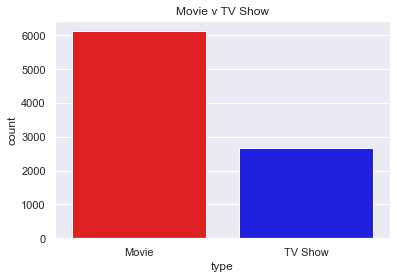

In [311]:
# Does Netflix have more Movies or TV Shows? 

# Graph no. 1
sns.set(style="darkgrid")
plt.title("Movie v TV Show")
ax = sns.countplot(x="type", data=netflix_df, palette=('Red','Blue'))

# can see Movies outnumber TV Shows by more than double the amount.

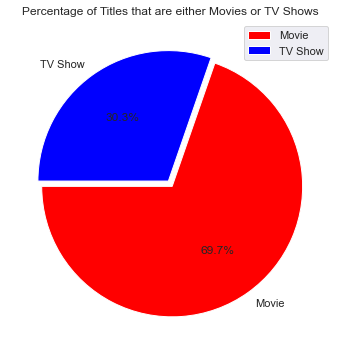

In [312]:
# Percentage of titles that are either Movies or TV Show?
# Graph no. 2

plt.figure(figsize=(12,6))
plt.title("Percentage of Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors=['red','blue'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

# To further illustrate the above we can see Movies represent over two thirds of the titles with 69.7%
# With such a large amount of Movie titles it may be ideal to carry out the majority of the EDA based on Movies.

# Ratings analysis:

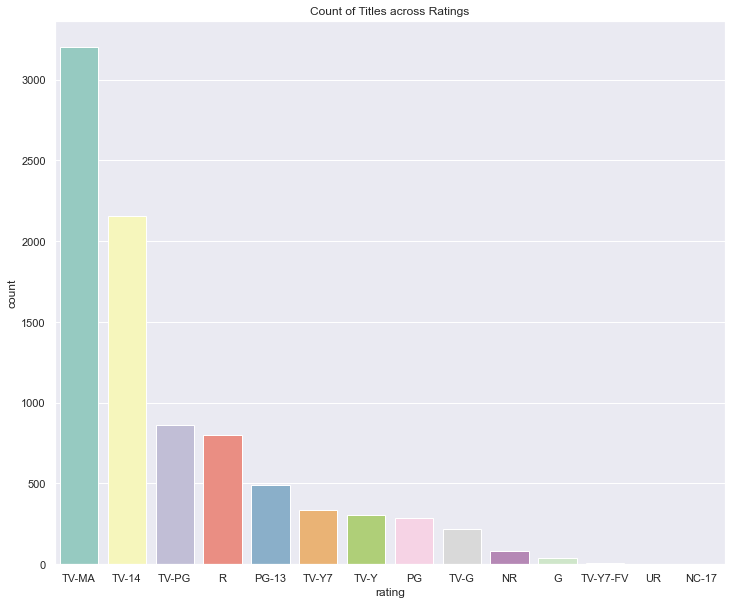

In [313]:
# Count of ratings across titles?
# Graph no. 3
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df, palette=("Set3"), order=netflix_df['rating'].value_counts().index[0:15])
plt.title('Count of Titles across Ratings')
plt.show()

# The largest count of titles is under the 'TV-MA' which is a title designed for mature audiences.
# After this the second largest is the 'TV-14' which stands for content inappropriate for children younger than 
# 14 years of age.


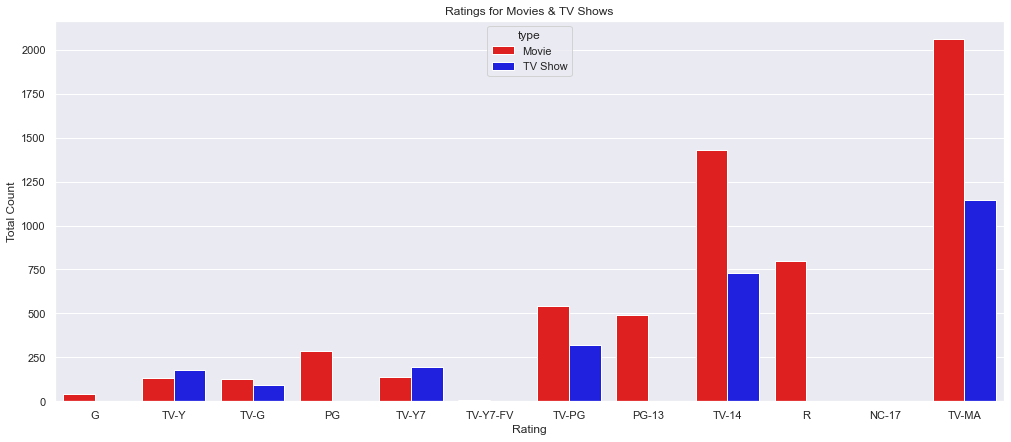

In [314]:
# Movies vs TV Shows by ratings?
# Graph no. 4
netflix_df.rating.value_counts()
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(17,7))
g = sns.countplot(netflix_df.rating, hue=netflix_df.type, order=order, palette=('Red','Blue'));
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

# Popular genres analysis:

In [315]:
# What are the different genres?

count_by_genre = netflix_df['genre'].value_counts()
count_by_genre


Dramas                          1599
Comedies                        1210
Action & Adventure               859
Documentaries                    829
International TV Shows           773
Children & Family Movies         605
Crime TV Shows                   399
Kids' TV                         385
Stand-Up Comedy                  334
Horror Movies                    275
British TV Shows                 252
Docuseries                       220
Anime Series                     174
International Movies             128
Reality TV                       120
TV Comedies                      119
Classic Movies                    80
TV Dramas                         67
Thrillers                         65
Movies                            53
TV Action & Adventure             39
Stand-Up Comedy & Talk Shows      34
Romantic TV Shows                 32
Anime Features                    21
Classic & Cult TV                 20
Independent Movies                20
Music & Musicals                  18
T

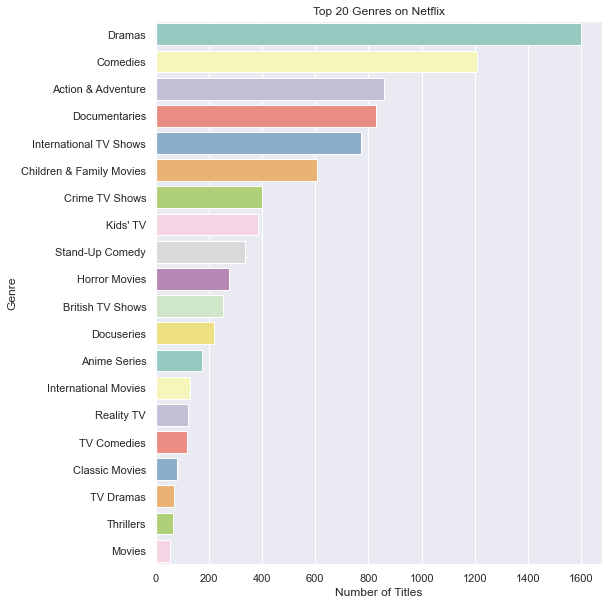

In [316]:
# What are the most popular genres? 
# Graph no. 5
popular_genres = netflix_df.set_index('title').genre.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(8,10))
g = sns.countplot(y = popular_genres, order=popular_genres.value_counts().index[:20],palette=("Set3"))
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Analysing content through the years:

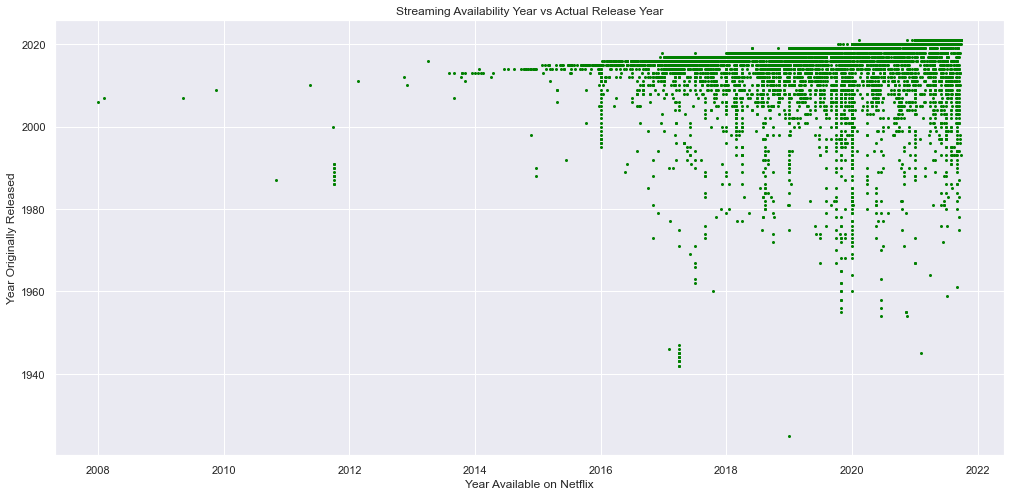

In [317]:
# Availability of content over the years? 
# Graph no. 6
netflix_df.plot(kind='scatter', x='date_added', y='release_year', figsize=(17,8), s=4, c='green')
plt.title('Streaming Availability Year vs Actual Release Year')
plt.xlabel('Year Available on Netflix')
plt.ylabel('Year Originally Released')
plt.show()

# Analysing movie titles by duration:

In [318]:
netflix_df['duration'].isnull().sum()
# check to see if there still missing duration values

0

In [319]:
netflix_df['duration'].value_counts()
# check of the count of different durations

1 Season     1791
2 Seasons     421
3 Seasons     198
90 min        152
94 min        146
             ... 
43 min          1
208 min         1
16 min          1
18 min          1
201 min         1
Name: duration, Length: 220, dtype: int64

In [320]:
movie_df = netflix_df[(netflix_df['type'] == 'Movie')]
movie_df.head()

# create a separate Movie dataset.
# we can check the trend of movie durations over time.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,2021-09-24,2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,Dramas,"On a photo shoot in Ghana, an American model s..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,Comedies,A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",2021-09-23,2021,TV-MA,127 min,Dramas,After most of her family is murdered in a terr...


In [321]:
movie_df['duration'].value_counts()

# can see there are some outliers in Movie duration.
# there is also the string 'min' included in the durations.

90 min     152
97 min     146
94 min     146
93 min     146
91 min     144
          ... 
237 min      1
16 min       1
18 min       1
3 min        1
212 min      1
Name: duration, Length: 205, dtype: int64

In [322]:
movie_df['duration']=movie_df['duration'].str.replace(' min','')
movie_df['duration']=movie_df['duration'].astype(str).astype(int)
movie_df['duration']

# we need to strip the 'min' and replace with an empty string.
# we also set the type to integer.

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 6126, dtype: int64

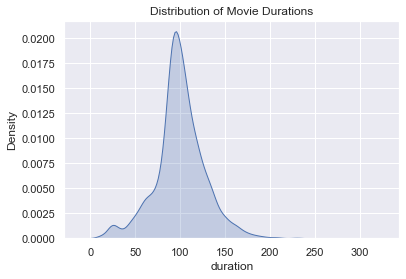

In [323]:
# Duration of Movies by Count:
# Graph no. 7
sns.set(style="darkgrid")
sns.kdeplot(data=movie_df['duration'], shade=True)
plt.title('Distribution of Movie Durations')
plt.show()

# now we can create a KDE graph to illustrate the distribution of Movie durations.
# a KDE graph is useful here as we have a large number of data points.

# a large amount of movies are between 75-120 mins. This makes sense as a lot of people find a 
# 3 hour movie too long to sit through in one go.

Text(0.5, 1.0, 'Movie Duration over the Years')

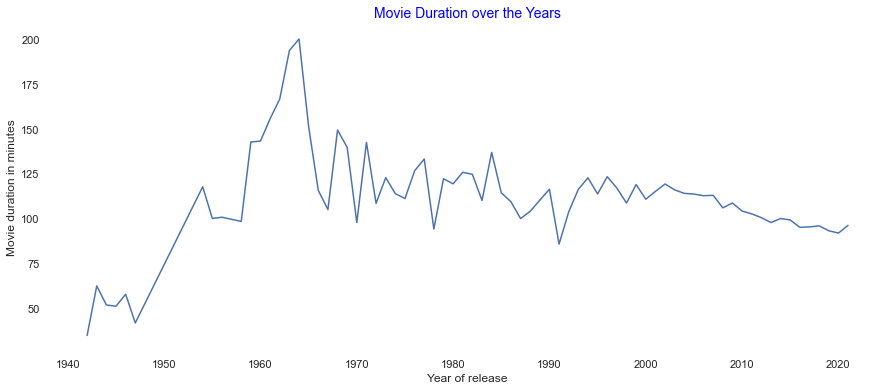

In [324]:
# Trend of Movie Duration by Year:
# Graph no. 8
duration_by_year = movie_df.groupby(['release_year']).mean()
duration_by_year = duration_by_year.sort_index()

plt.figure(figsize=(15,6))
sns.lineplot(x=duration_by_year.index, y=duration_by_year.duration.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of release')
plt.title("Movie Duration over the Years", fontsize=14, color='blue')

# can see the change in Movie duration over time.
# 1960 - 1970 has the highest duration in minutes before it levels out in the later part of the century.

Text(0.5, 1.0, 'Number of Content Released by Year')

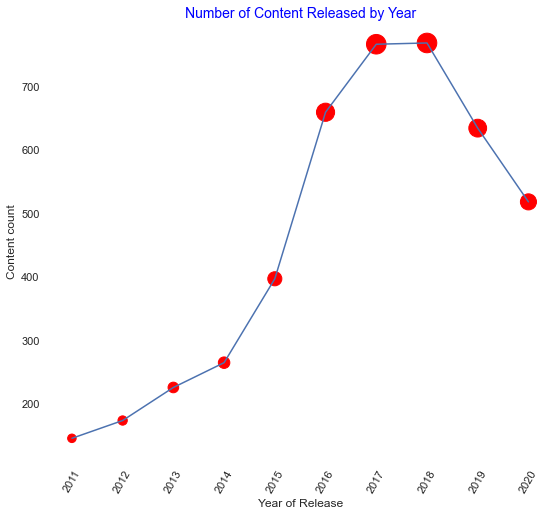

In [325]:
# Number of content released by year:
# Graph no. 9
release_year = movie_df['release_year'].value_counts()
release_year = release_year.sort_index(ascending=True)

plt.figure(figsize=(9,8))
plt.plot(release_year[-11:-1])
plt.scatter(release_year[-11:-1].index, release_year[-11:-1].values, s=0.5*release_year[-11:-1].values, c='Red')
plt.box(on=None)
plt.ylabel('Content count')
plt.xlabel('Year of Release')
plt.xticks(rotation = 60)
plt.xticks(release_year[-11:-1].index)
plt.title('Number of Content Released by Year', color='blue', fontsize=14)

# there was a sharp increase in content released from 2014 tp 2018.
# the number of content released by year peaked in 2017 & 2018.

# Inspecting IMDb titles/Merging with Netflix dataset

In [326]:
#Reading and Inspecting Movie titles data for IMDb
IMDb_user_ratings = pd.read_csv(r'/Users/Downloads/UCDPA Project Folder/IMDB-Ratings.csv')
IMDb_user_ratings.head()

,Unnamed: 0,titleId,title,averageRating,numVotes
0,0,tt0000001,Carmencita,5.7,1676
1,1,tt0000002,Le clown et ses chiens,6.1,208
2,2,tt0000003,Pauvre Pierrot,6.5,1404
3,3,tt0000004,Un bon bock,6.2,123
4,4,tt0000005,Blacksmith Scene,6.2,2200


In [327]:
IMDb_user_ratings.info()

# as there is only 5 columns and we will be mergin this to the netflix dataset we will not drop any columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67408 entries, 0 to 67407
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     67408 non-null  int64  
 1   titleId        67408 non-null  object 
 2   title          67408 non-null  object 
 3   averageRating  67408 non-null  float64
 4   numVotes       67408 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.6+ MB


In [328]:
IMDb_user_ratings.isnull().sum()
# # check and count of missing values returns zero.

Unnamed: 0       0
titleId          0
title            0
averageRating    0
numVotes         0
dtype: int64

In [329]:
netflix_IMDb_df = pd.merge(netflix_df,IMDb_user_ratings, how='inner', on ='title')
netflix_IMDb_df.head()
# using pandas to merge both datasets on titles that appear in both.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,Unnamed: 0,titleId,averageRating,numVotes
0,s2,TV Show,Blood & Water,No data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t...",66934,tt9839146,6.2,1752
1,s5,TV Show,Kota Factory,No data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,In a city of coaching centers known to train I...,64666,tt9432978,9.0,27567
2,s20,TV Show,Jaguar,No data,"Blanca Suárez, Iván Marcos, Óscar Casas, Adriá...",United States,2021-09-22,2021,TV-MA,1 Season,International TV Shows,"In the 1960s, a Holocaust survivor joins a gro...",6502,tt0049379,5.5,33
3,s26,TV Show,Love on the Spectrum,No data,Brooke Satchwell,Australia,2021-09-21,2021,TV-14,2 Seasons,Docuseries,Finding love can be hard for anyone. For young...,39020,tt11904786,8.5,2823
4,s33,TV Show,Sex Education,No data,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,2021-09-17,2020,TV-MA,3 Seasons,British TV Shows,Insecure Otis has all the answers when it come...,51376,tt7767422,8.3,156360


In [330]:
netflix_IMDb_df.isnull().sum()
# check and count of missing values returns zero.

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added       0
release_year     0
rating           0
duration         0
genre            0
description      0
Unnamed: 0       0
titleId          0
averageRating    0
numVotes         0
dtype: int64

In [331]:
netflix_IMDb_df.shape

(2389, 16)

In [332]:
#Sorting in a descending order, so as the output should reflect highest rated movies on top
netflix_IMDb_df.sort_values(by=['averageRating'],inplace=True , ascending = False)
netflix_IMDb_df.head(20)
# A look at the top 20 list gives us title suggestions on what we can use for our recommender system.
# I will take the movie title 'savages' as one.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,Unnamed: 0,titleId,averageRating,numVotes
2274,s8246,Movie,The Chosen,Antonio Chavarrías,"Alfonso Herrera, Hannah Murray, Henry Goodman,...","Spain, Mexico",2017-04-14,2016,TV-14,111 min,Dramas,"In 1937, Spanish revolutionary Ramón trains as...",64878,tt9471404,9.7,12433
322,s1367,Movie,Fatima,Marco Pontecorvo,"Joaquim de Almeida, Goran Visnjic, Stephanie G...","Portugal, United States",2021-01-31,2020,PG-13,113 min,Dramas,"In 1917 Portugal, visions of the Virgin Mary c...",39520,tt1205482,9.6,5
128,s625,Movie,Prime Time,Jakub Piątek,"Bartosz Bielenia, Magdalena Popławska, Andrzej...",United States,2021-06-30,2021,TV-MA,92 min,Dramas,"On New Year’s Eve 1999, an armed man enters a ...",58096,tt8560108,9.4,69
1330,s3939,TV Show,Our Planet,No data,David Attenborough,"United States, United Kingdom",2019-04-05,2019,TV-PG,1 Season,Docuseries,Experience our planet's natural beauty and exa...,63512,tt9253866,9.3,32453
735,s2517,Movie,The End,Mohammed Alhmly,"Mohamed El Hemaly, Abdulla Al-khudr, Ghadeer Z...",Kuwait,2020-05-17,2019,TV-MA,97 min,Action & Adventure,A wrongly accused man is pursued by a dogged i...,46645,tt7183160,9.3,2547
142,s681,TV Show,The Last Dance,No data,"Michael Jordan, Scottie Pippen, Dennis Rodman",United States,2021-06-19,2020,TV-MA,1 Season,Docuseries,This docuseries gives a definitive account of ...,56933,tt8420184,9.2,79001
539,s2020,Movie,Cycle,Prakash Kunte,"Hrishikesh Joshi, Bhalchandra Kadam, Priyadars...",India,2020-09-10,2018,TV-PG,96 min,Comedies,"When his prized bicycle is stolen, an astrolog...",38064,tt11730576,9.2,92
2384,s8776,TV Show,Yeh Meri Family,No data,"Vishesh Bansal, Mona Singh, Akarsh Khurana, Ah...",India,2018-08-31,2018,TV-PG,1 Season,International TV Shows,"In the summer of 1998, middle child Harshu bal...",58347,tt8595766,9.1,19543
361,s1490,TV Show,Regiment Diaries,No data,No data,India,2020-12-26,2020,TV-PG,2 Seasons,Docuseries,Historical footage and interviews with soldier...,65780,tt9642576,9.1,49
650,s2277,Movie,Inkaar,Sudhir Mishra,"Arjun Rampal, Chitrangada Singh, Deepti Naval,...",India,2020-07-05,2013,TV-MA,125 min,Dramas,An ad agency CEO is put under investigation wh...,28523,tt10094404,9.1,53
